### Imports

In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import matplotlib.ticker as mtick
import sys
import os

# Add the parent folder to sys.path
parent_folder = os.path.abspath('..')
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

# Import the module from the parent folder
import XFEL_BPM

### Date and prefix

In [2]:
date = "2025_05_20"
save_name_prefix = "plots/XFEL/Position/" + date + "_XFEL_plot"

### Get bunch pattern

In [3]:
file = '../XFEL_data/BPM_data/matched_linac_main_run2148_file114155_20231120T155943.all.hdf5'
df_bp = XFEL_BPM.getH5dataInDF(file, getPosition=False)

Load matched_linac_main_run2148_file114155_20231120T155943.all.hdf5 | 49 bpms, 3391 trains, 2708 bunches: |██████████████████████████████████████████████████| 100.0% Complete


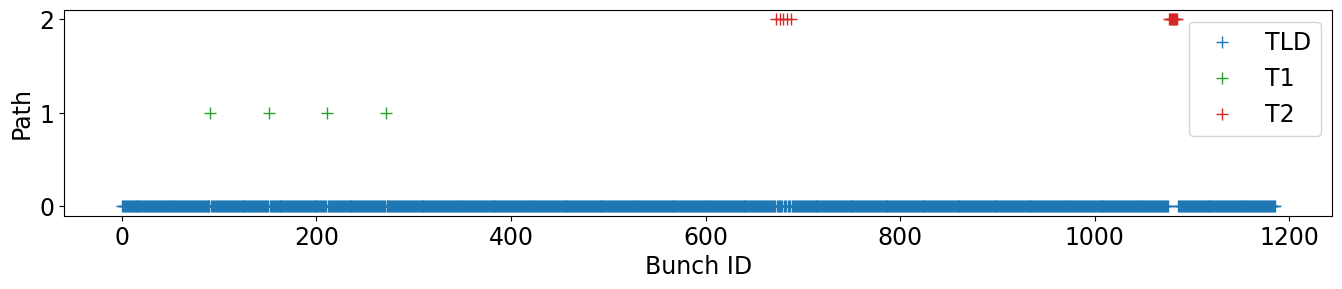

In [4]:
XFEL_BPM.plotBunchPattern(df_bp, sample=1, figsize=[14, 3])

### Check if consistant data

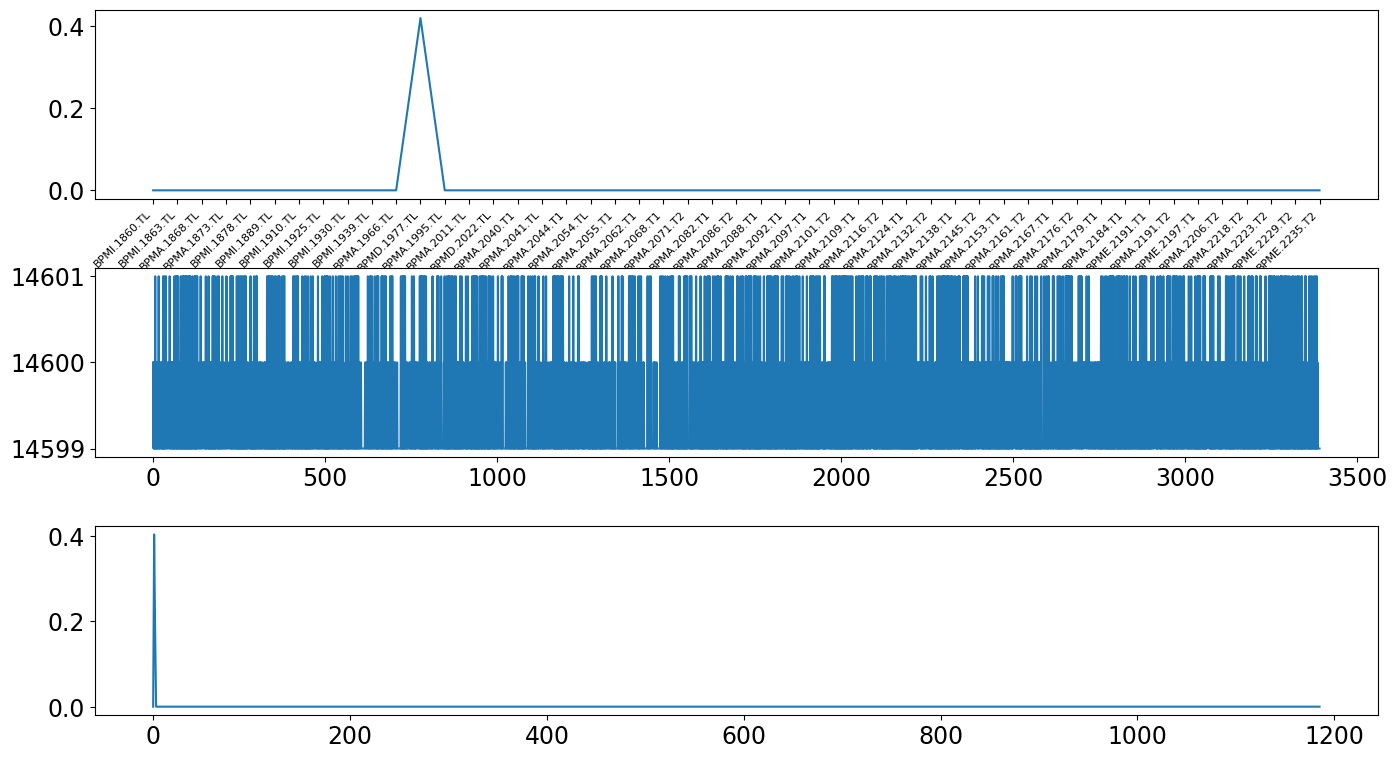

In [5]:
XFEL_BPM.checkTrainBunchConsistancy(df_bp)

# Get H5 data in DF

In [3]:
df = XFEL_BPM.getH5dataInDF('../XFEL_data/BPM_data/reduced_matched_linac_main_run2148_file114155_20231120T155943.all.hdf5')

Load reduced_matched_linac_main_run2148_file114155_20231120T155943.all.hdf5 | 49 bpms, 3391 trains, 9 bunches: |██████████████████████████████████████████████████| 100.0% Complete


## Jitter and Noise

Mad8.readTwissFile > nrec=8541


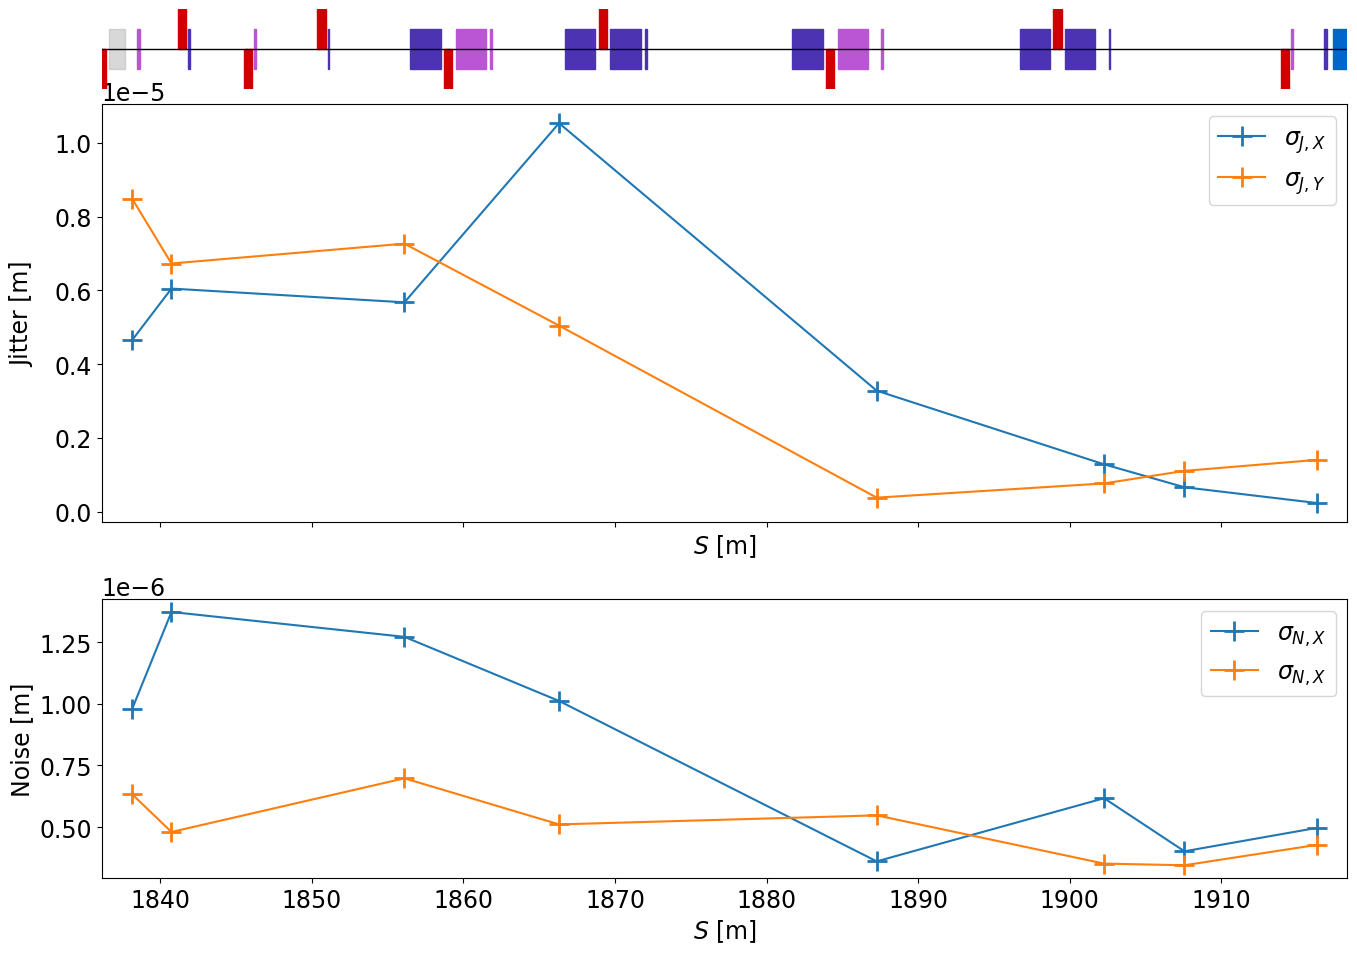

In [13]:
bpm_list = ['BPMI.1860.TL', 'BPMI.1863.TL', 'BPMI.1878.TL', 'BPMI.1889.TL', 'BPMI.1910.TL', 'BPMI.1925.TL', 'BPMI.1930.TL', 
            'BPMI.1939.TL']#, 'BPMD.1977.TL', 'BPMD.2022.TL', 'BPME.2229.T2', 'BPME.2235.T2']
XFEL_BPM.plotJitterAndNoise(df, '../../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=[6,7,8], bpms=bpm_list,
                            plotJitter=True, plotNoise=True, plotSigma=False, figsize=[14, 10], height_ratios=[3,2])

Mad8.readTwissFile > nrec=8541


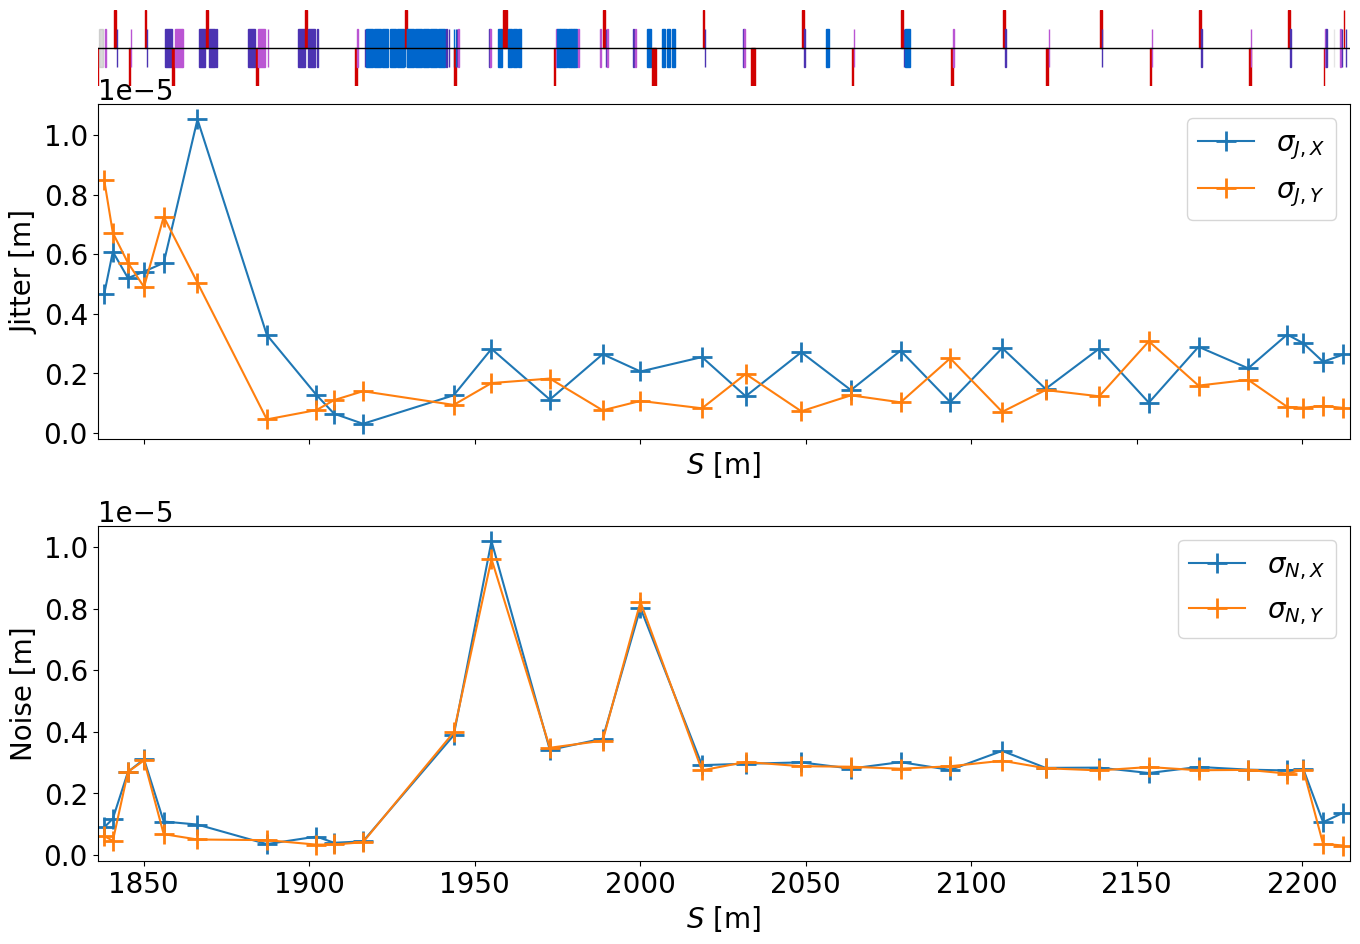

In [6]:
XFEL_BPM.plotJitterAndNoise(df, '../../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=6, plotJitter=True, plotNoise=True, plotSigma=False, figsize=[14, 10], height_ratios=[2,2], font_size=20)
_plt.savefig("{}_Jitter_Noise_for_T2.pdf".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8541


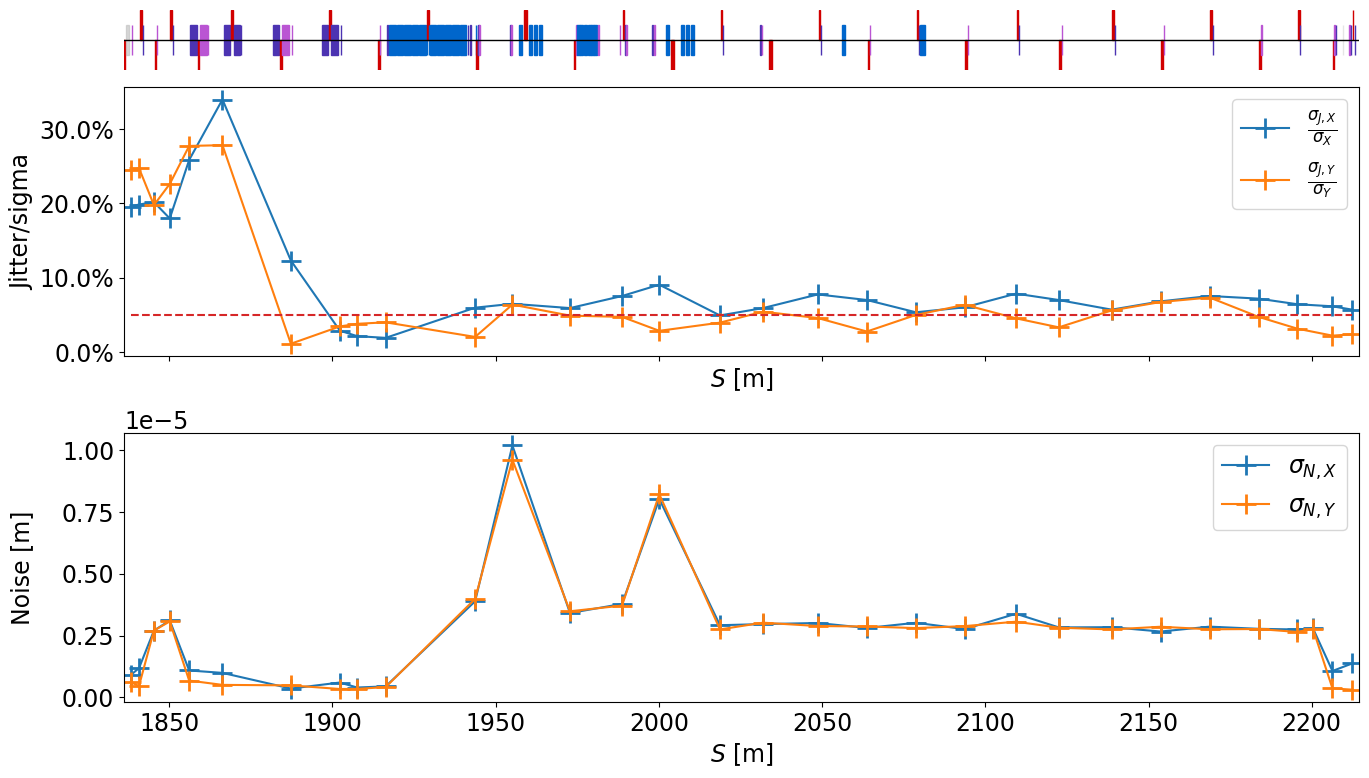

In [6]:
XFEL_BPM.plotJitterAndNoise(df, '../../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=6, plotJitter=False, plotNoise=True, plotSigma=True, figsize=[14, 8], height_ratios=[2,2])
_plt.savefig("{}_Jitter_Sigma_Noise_for_T2".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


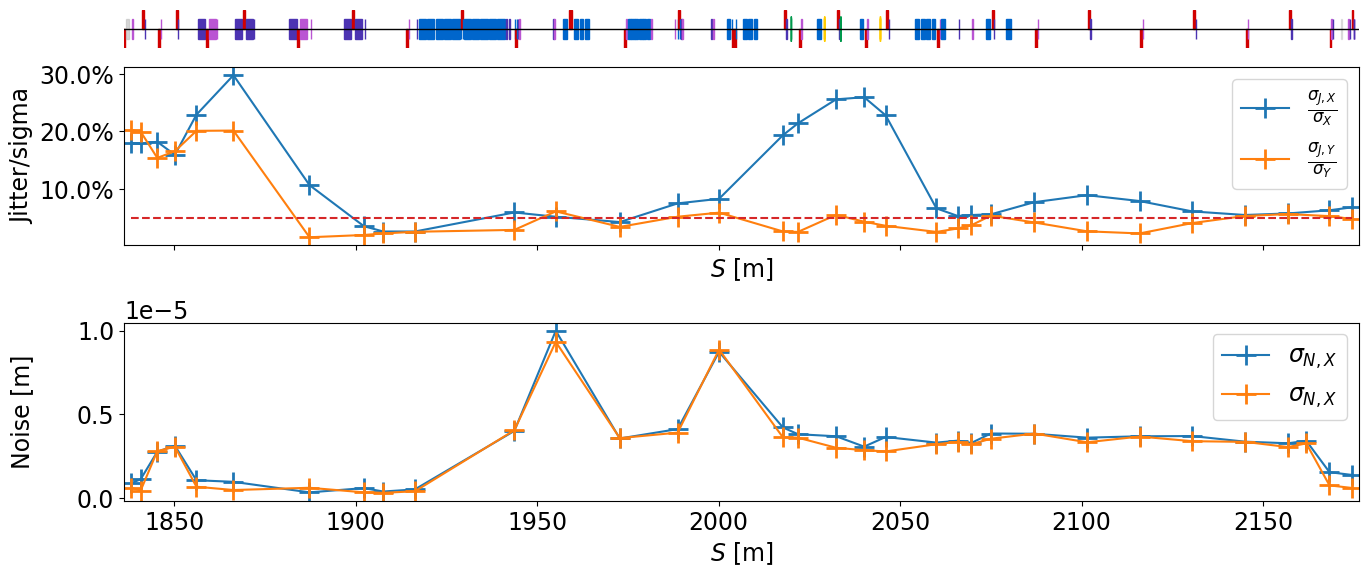

In [12]:
XFEL_BPM.plotJitterAndNoise(df, '../../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=3, plotJitter=False, plotNoise=True, plotSigma=True, figsize=[14, 6], height_ratios=[2,2])
_plt.savefig("{}_Jitter_Noise_for_T1".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [14]:
df_all = XFEL_BPM.getH5dataInDF('../XFEL_data/BPM_data/matched_linac_main_run2148_file114155_20231120T155943.all.hdf5')

Load matched_linac_main_run2148_file114155_20231120T155943.all.hdf5 | 49 bpms, 3391 trains, 2708 bunches: |██████████████████████████████████████████████████| 100.0% Complete


In [15]:
df_all

Valid            S         X         Y
BPM          TrainID    BunchID                                        
BPMI.1860.TL 1857289827 0          1.0  1838.149255 -0.000096  0.000149
                        1          1.0  1838.149255 -0.000094  0.000153
                        2          1.0  1838.149255 -0.000097  0.000151
                        3          1.0  1838.149255 -0.000097  0.000152
                        4          1.0  1838.149255 -0.000097  0.000153
...                                ...          ...       ...       ...
BPME.2235.T2 1857293217 2703       0.0  2212.476589  0.000000  0.000000
                        2704       0.0  2212.476589  0.000000  0.000000
                        2705       0.0  2212.476589  0.000000  0.000000
                        2706       0.0  2212.476589  0.000000  0.000000
                        2707       0.0  2212.476589  0.000000  0.000000

[449958572 rows x 4 columns]

In [42]:
def PlotHist(df, bpms=None, trains=None, bunches=None):
    df_reduced = XFEL_BPM.reduceDFbyBPMTrainBunchByIndex(df, bpms=bpms, trains=trains, bunches=bunches)
    _plt.hist(df_reduced['X'], bins=20, histtype='step', label="std_x = " + str(_np.std(df_reduced['X'])))
    _plt.hist(df_reduced['Y'], bins=20, histtype='step', label="std_y = " + str(_np.std(df_reduced['Y'])))

def PlotAlong(df, bpms=None, trains=None, bunches=None):
    df_reduced = XFEL_BPM.reduceDFbyBPMTrainBunchByIndex(df, bpms=bpms, trains=trains, bunches=bunches)
    if bpms is None and trains is not None and bunches is not None:
        _plt.plot(df_reduced.index.get_level_values('BPM'), df_reduced['X'], label="mean_x = " + str(_np.mean(df_reduced['X'])))
        _plt.plot(df_reduced.index.get_level_values('BPM'), df_reduced['Y'], label="mean_y = " + str(_np.mean(df_reduced['Y'])))
    elif bpms is not None and trains is None and bunches is not None:
        _plt.plot(df_reduced.index.get_level_values('TrainID'), df_reduced['X'], label="mean_x = " + str(_np.mean(df_reduced['X'])))
        _plt.plot(df_reduced.index.get_level_values('TrainID'), df_reduced['Y'], label="mean_y = " + str(_np.mean(df_reduced['Y'])))
    elif bpms is not None and trains is not None and bunches is None:
        _plt.plot(df_reduced.index.get_level_values('BunchID'), df_reduced['X'], label="mean_x = " + str(_np.mean(df_reduced['X'])))
        _plt.plot(df_reduced.index.get_level_values('BunchID'), df_reduced['Y'], label="mean_y = " + str(_np.mean(df_reduced['Y'])))
    else:
        raise ValueError("Must use exactly 2 out of 3 between bpms, trains and bunches")

def PlotAll(df, bpms=None, trains=None, bunches=None, figsize=[9, 6]):
    fig, ax = XFEL_BPM.plotOptions(figsize=figsize, rows_colums=[1, 2], height_ratios=None, sharex=False, sharey=False, font_size=15)
    ax[0].yaxis.set_major_formatter(mtick.ScalarFormatter(useOffset=False))
    ax[1].yaxis.set_major_formatter(mtick.ScalarFormatter(useOffset=False))
    ax[0].xaxis.set_major_formatter(mtick.ScalarFormatter(useOffset=False))
    ax[1].xaxis.set_major_formatter(mtick.ScalarFormatter(useOffset=False))
    
    if bpms is None and trains is not None and bunches is not None:
        Xlabel = 'BPMs'
    elif bpms is not None and trains is None and bunches is not None:
        Xlabel = 'Train ID'
    elif bpms is not None and trains is not None and bunches is None:
        Xlabel = 'Bunch ID'
    else:
        raise ValueError("Must use exactly 2 out of 3 between bpms, trains and bunches")

    _plt.subplot(1, 2, 1)
    PlotAlong(df, bpms=bpms, trains=trains, bunches=bunches)
    _plt.ticklabel_format(axis="both", style="sci", scilimits=(-3, 3))
    _plt.xticks(rotation=45)
    _plt.ylabel("X/Y [m]")
    _plt.xlabel(Xlabel)
    _plt.legend()

    _plt.subplot(1, 2, 2)
    PlotHist(df, bpms=bpms, trains=trains, bunches=bunches)
    _plt.ticklabel_format(axis="both", style="sci", scilimits=(-3, 3))
    _plt.xticks(rotation=45)
    _plt.xlabel("X/Y [m]")
    _plt.legend()

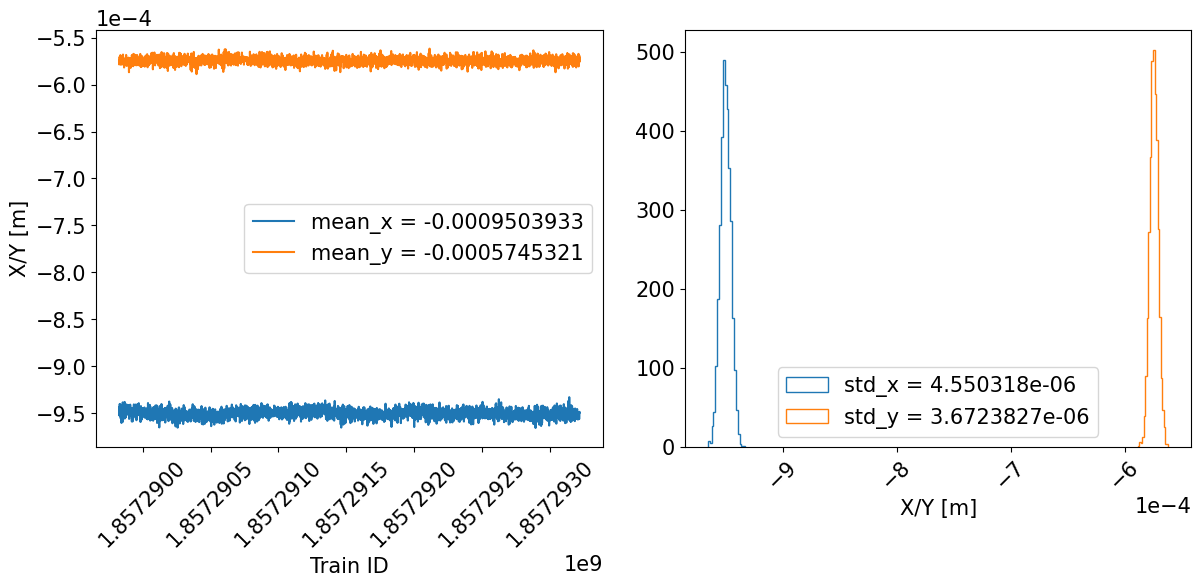

In [45]:
PlotAll(df, bpms="BPMA.2097.T1", trains=None, bunches=3, figsize=[12, 5])

## Jitter and Optics

Mad8.readTwissFile > nrec=8541


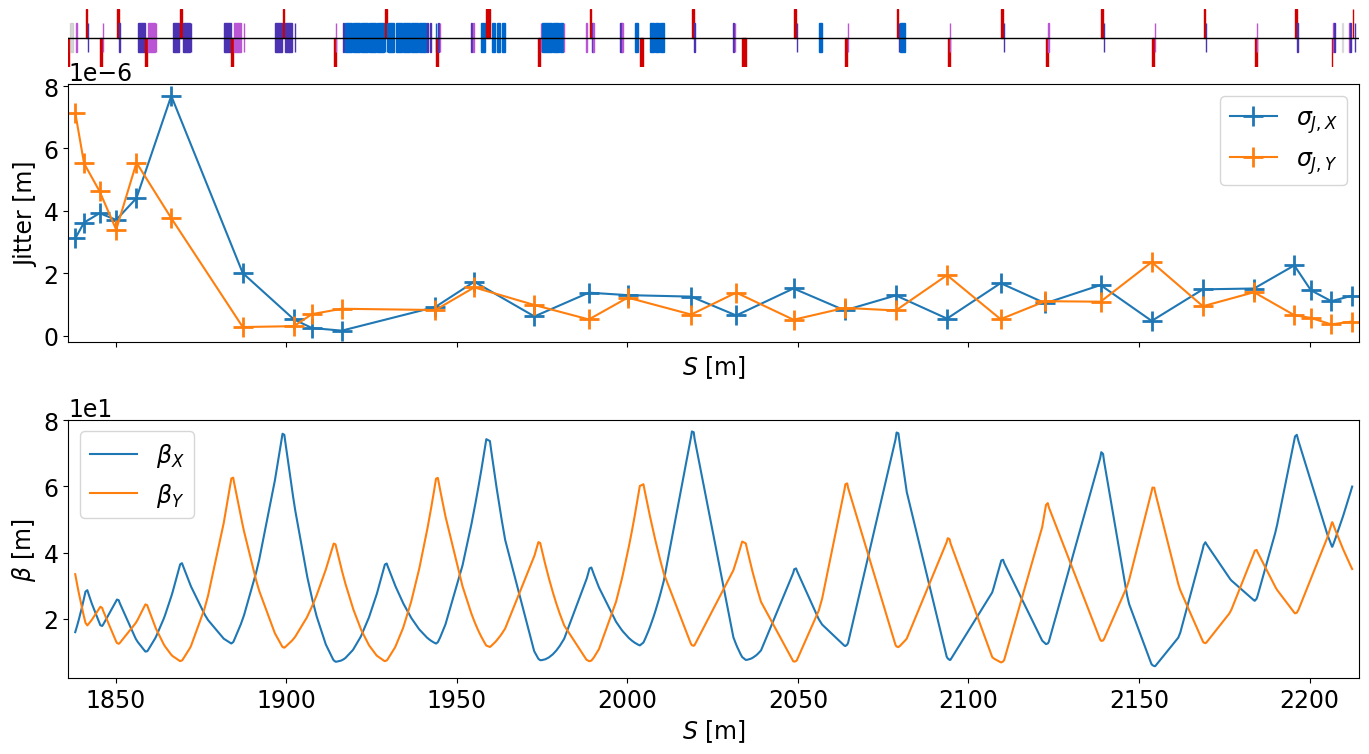

In [6]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=6, plotBeta=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Beta_for_T2".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


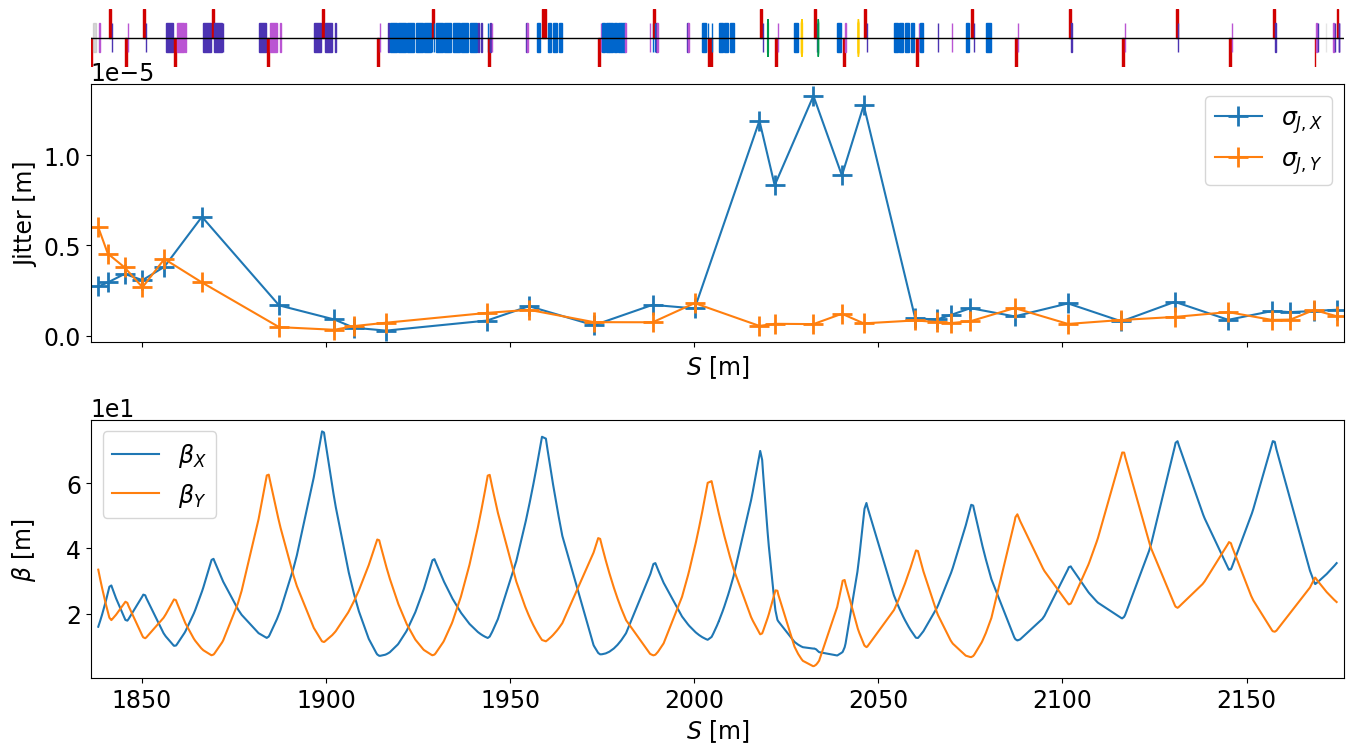

In [7]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=3, plotBeta=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Beta_for_T1".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8541


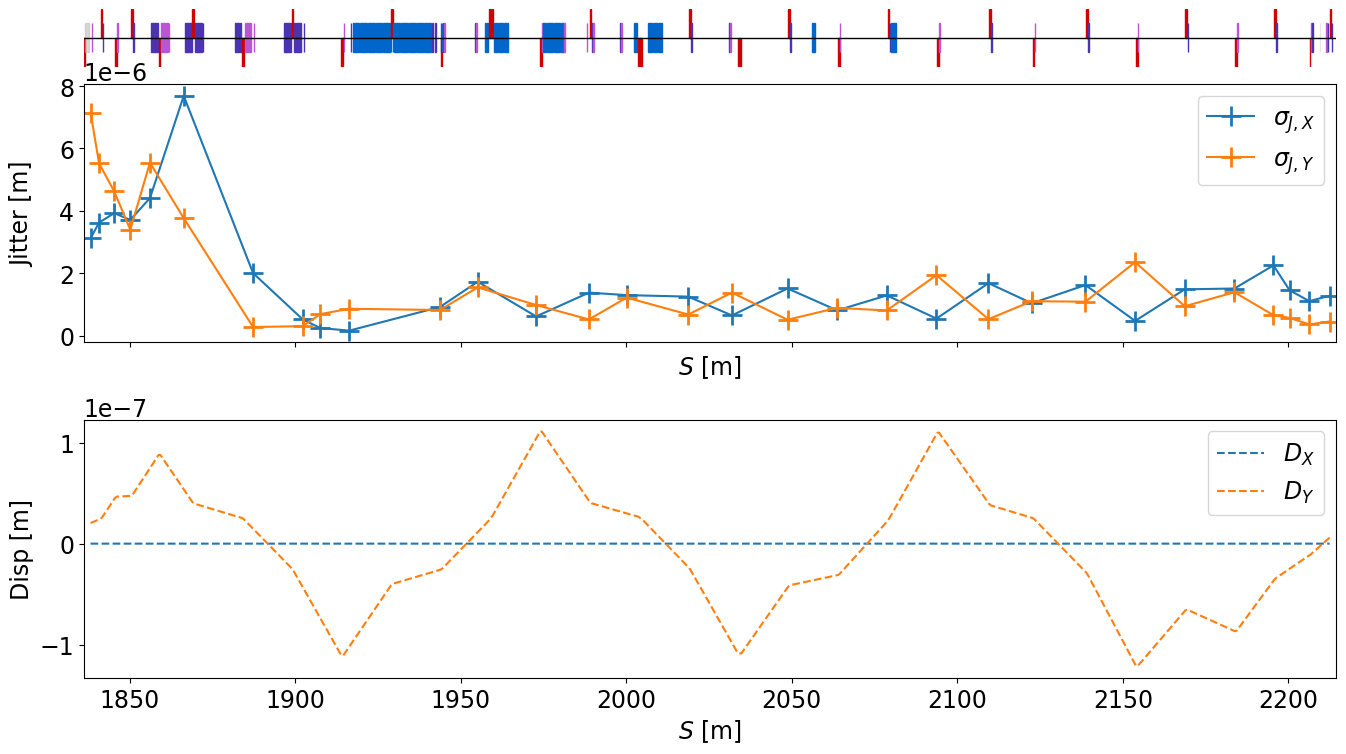

In [8]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=6, plotDisp=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Disp_for_T2".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


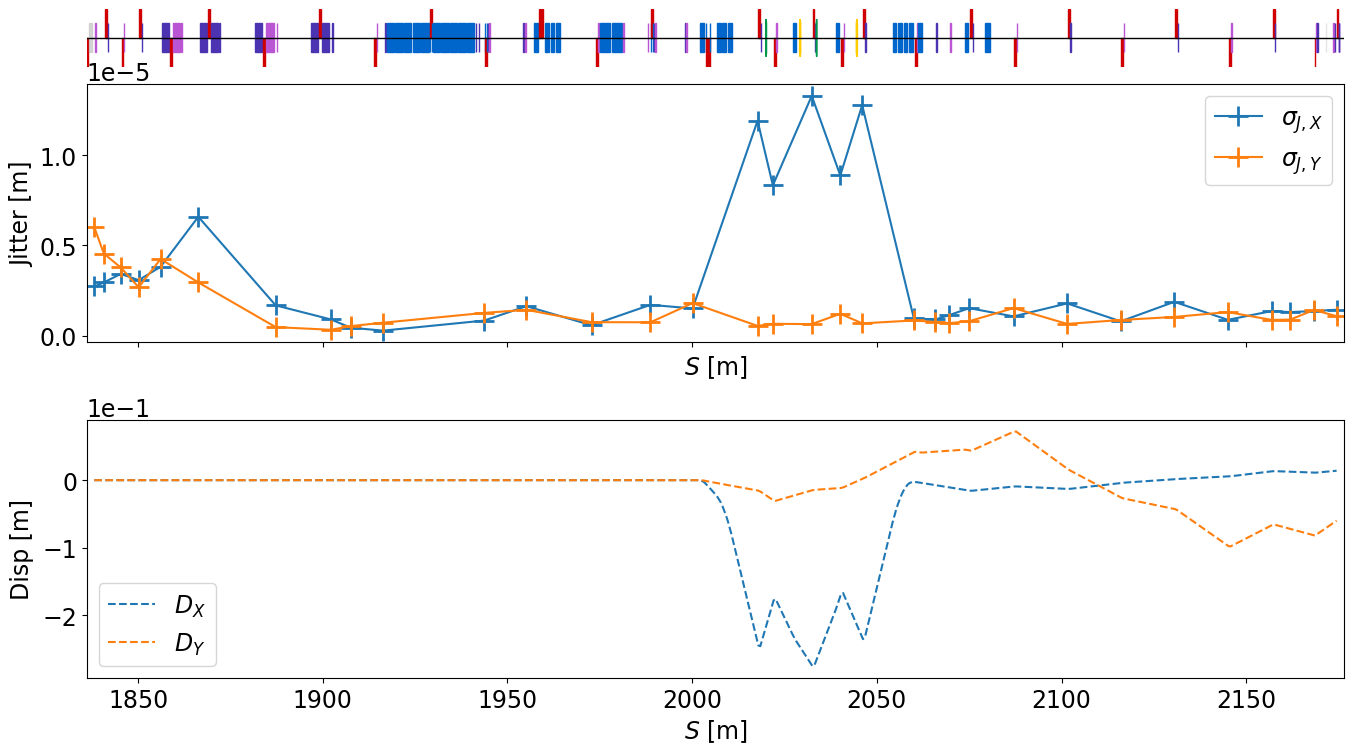

In [9]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=3, plotDisp=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Disp_for_T1".format(save_name_prefix), dpi=300, bbox_inches='tight')

## Jitter and Sigma

Mad8.readTwissFile > nrec=8541


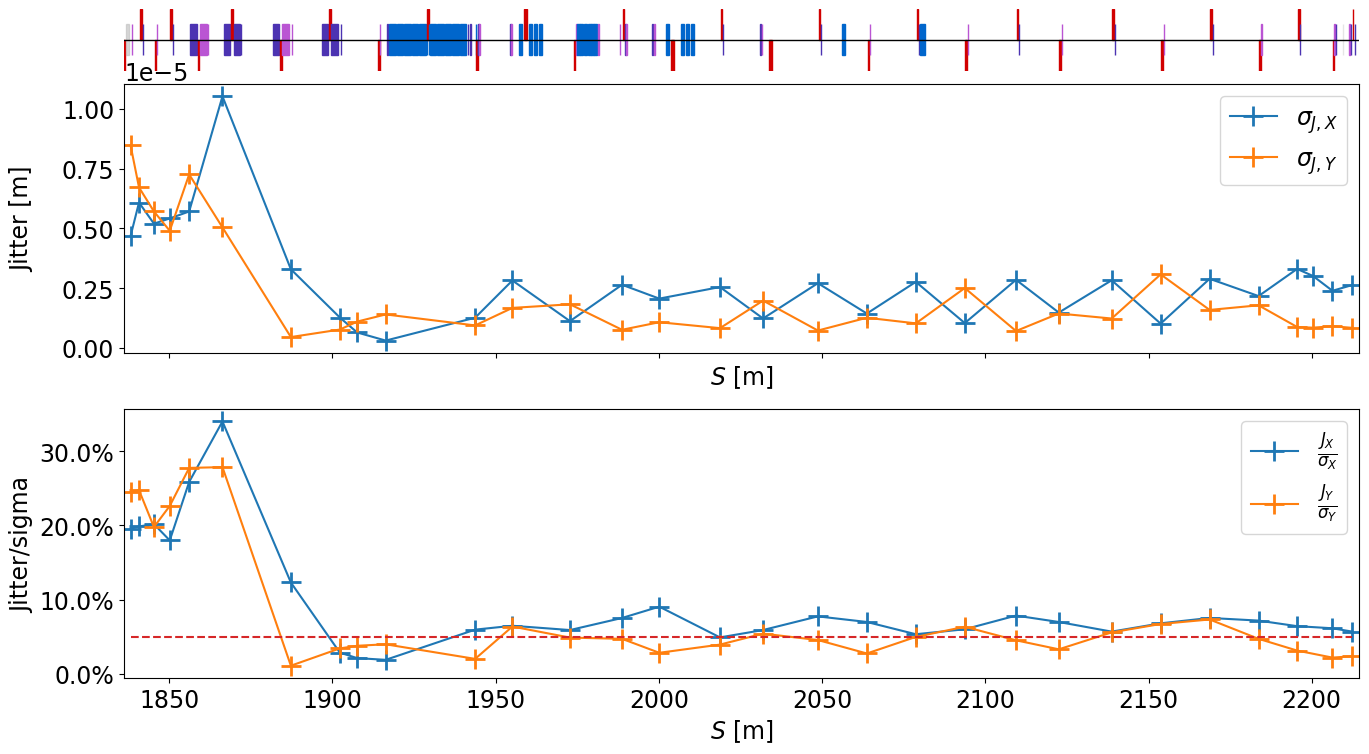

In [8]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=6, esprd=1e-6, plotSigma=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Sigma_for_T2".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


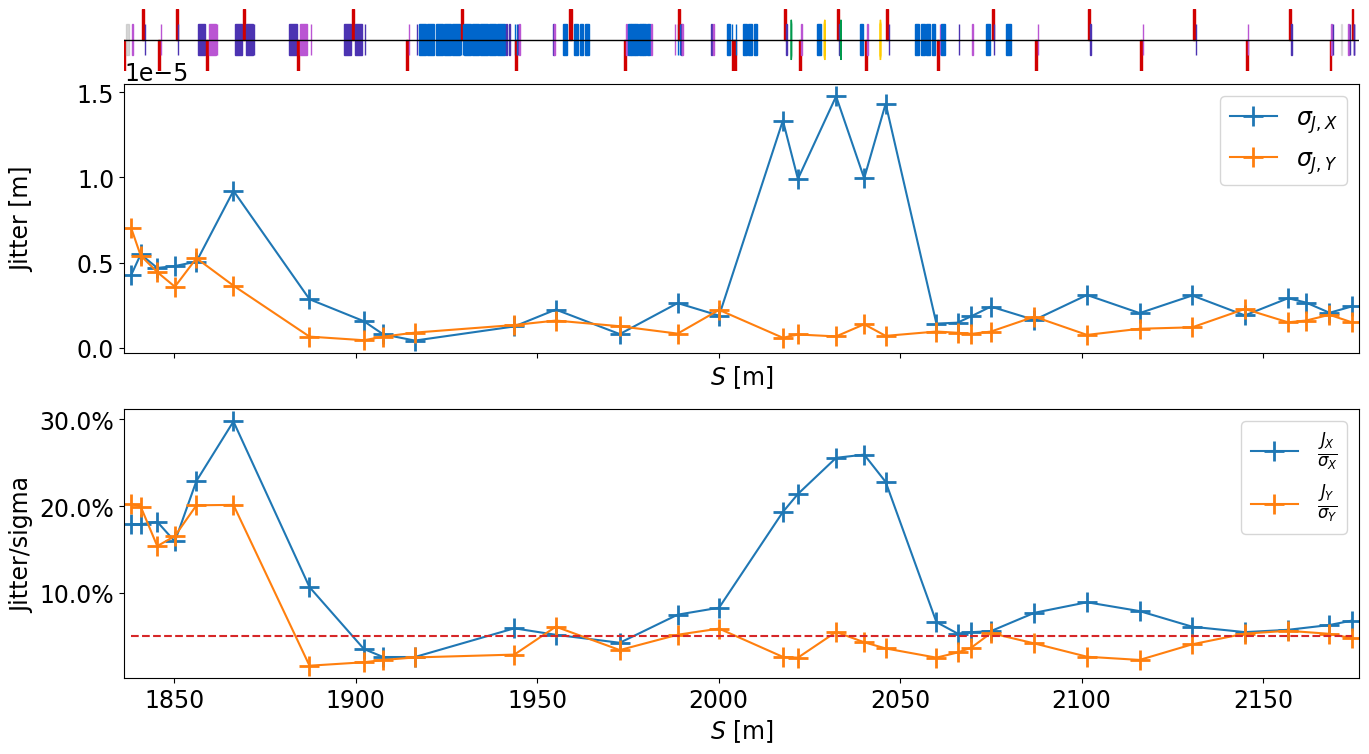

In [7]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=3, esprd=1e-6, plotSigma=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Sigma_for_T1".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


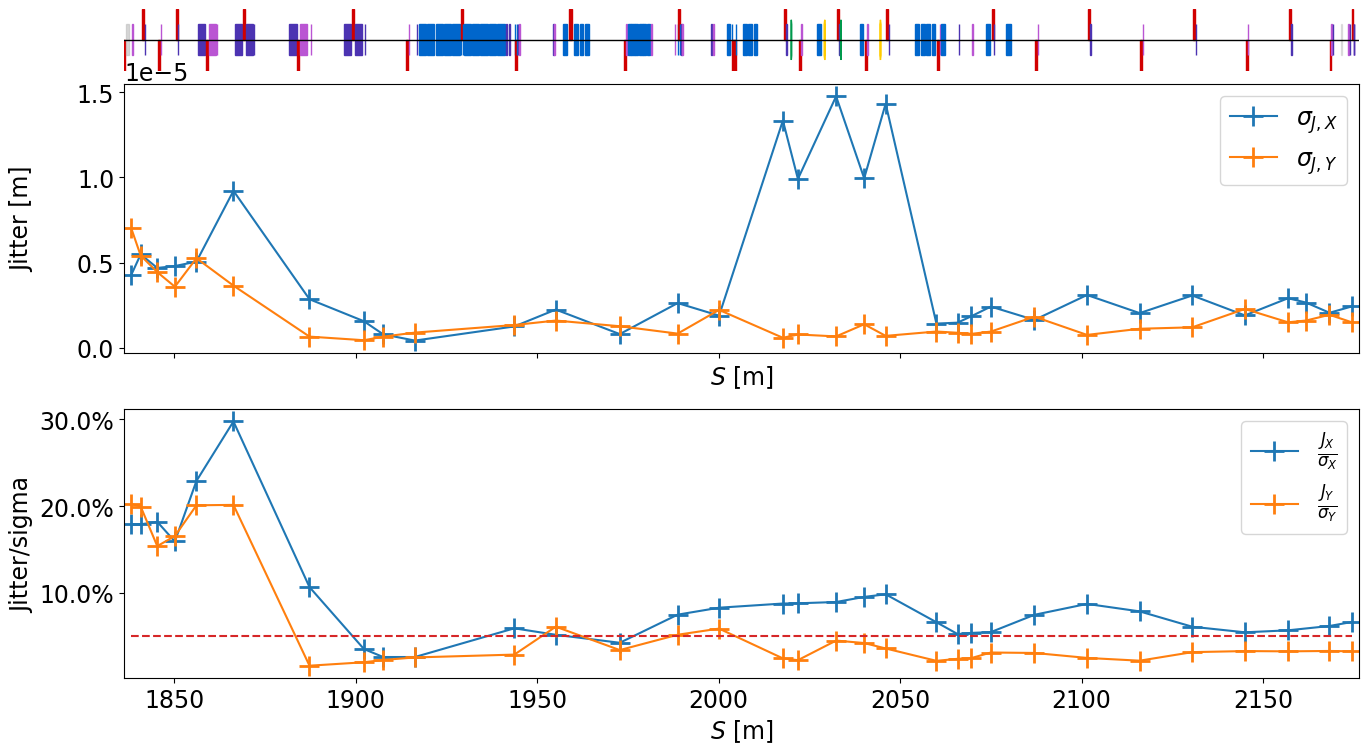

In [4]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=3, esprd=3e-6, plotSigma=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Sigma_for_T1_with_adjusted_Esprd".format(save_name_prefix), dpi=300, bbox_inches='tight')

## Max angle Jitter

Mad8.readTwissFile > nrec=8541


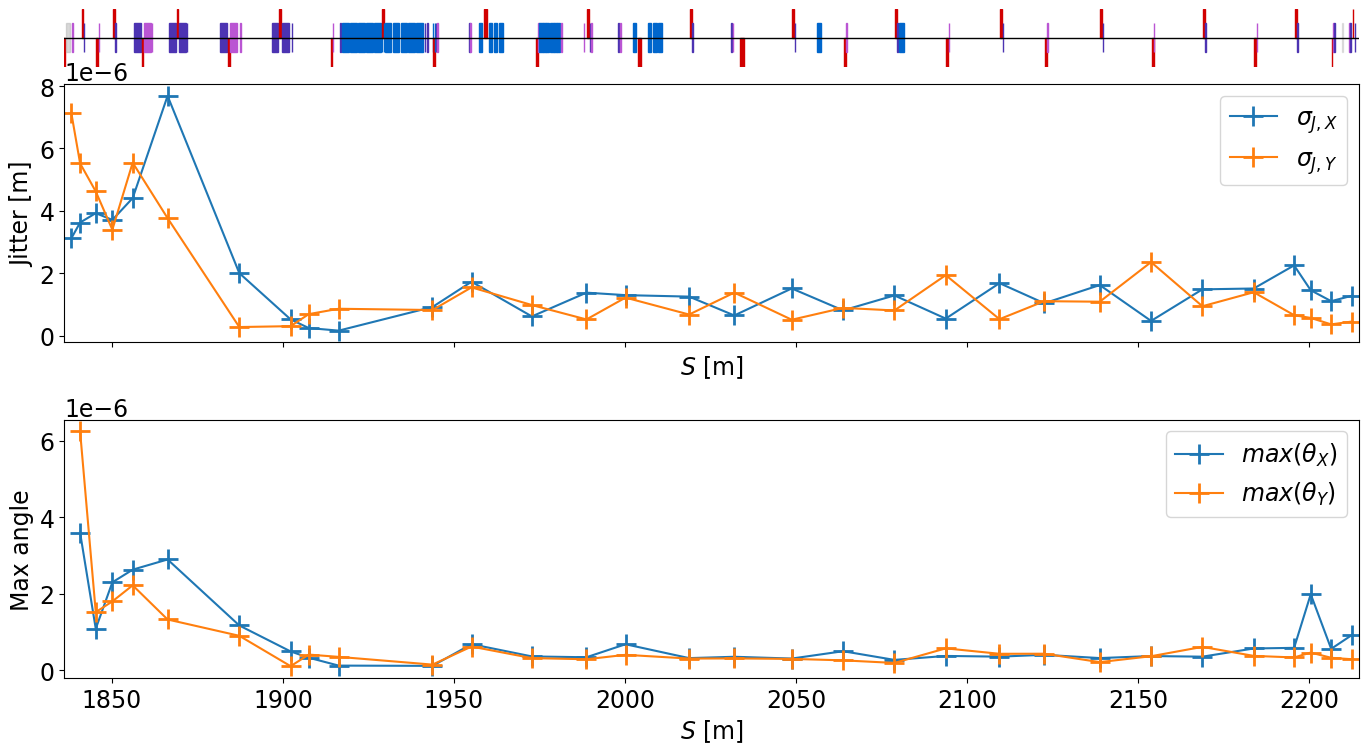

In [13]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=6, plotAngle=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Angle_for_T2".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


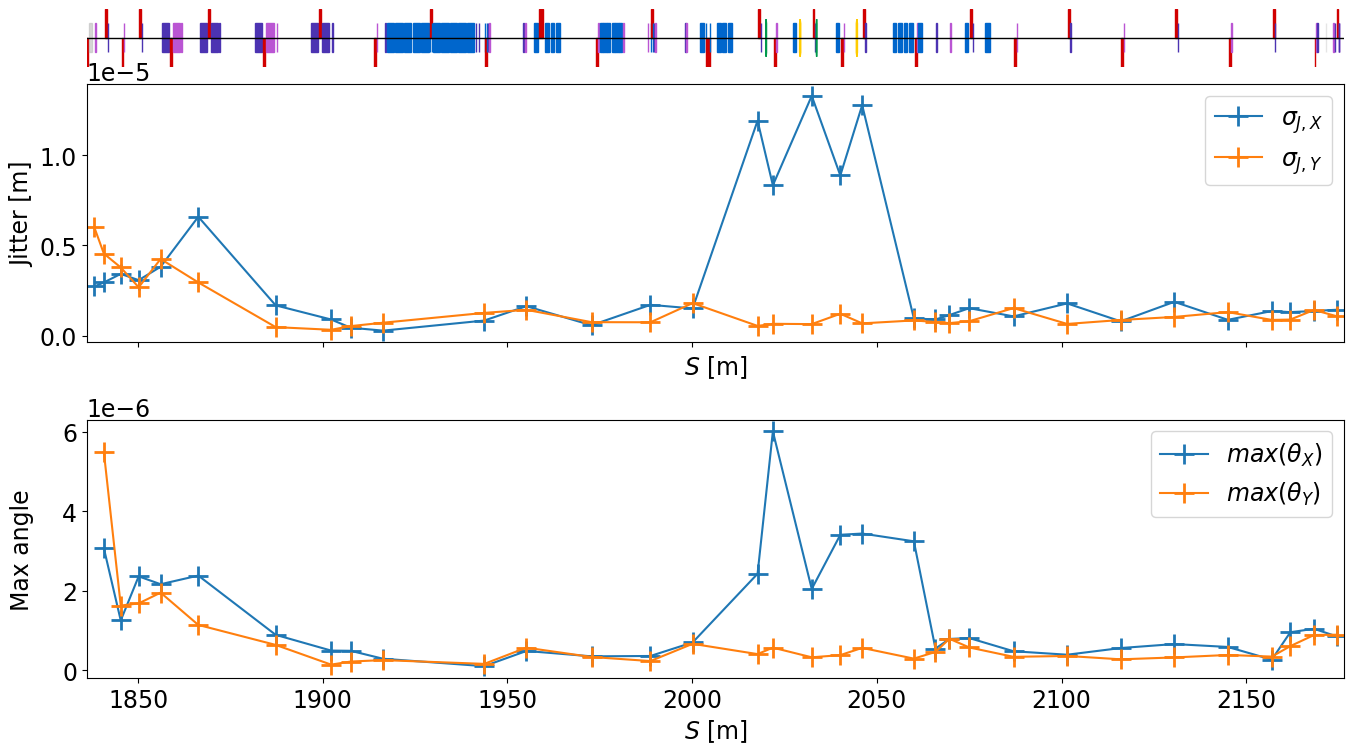

In [14]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=3, plotAngle=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Angle_for_T1".format(save_name_prefix), dpi=300, bbox_inches='tight')

## Jitter and Position Mean

Mad8.readTwissFile > nrec=8541


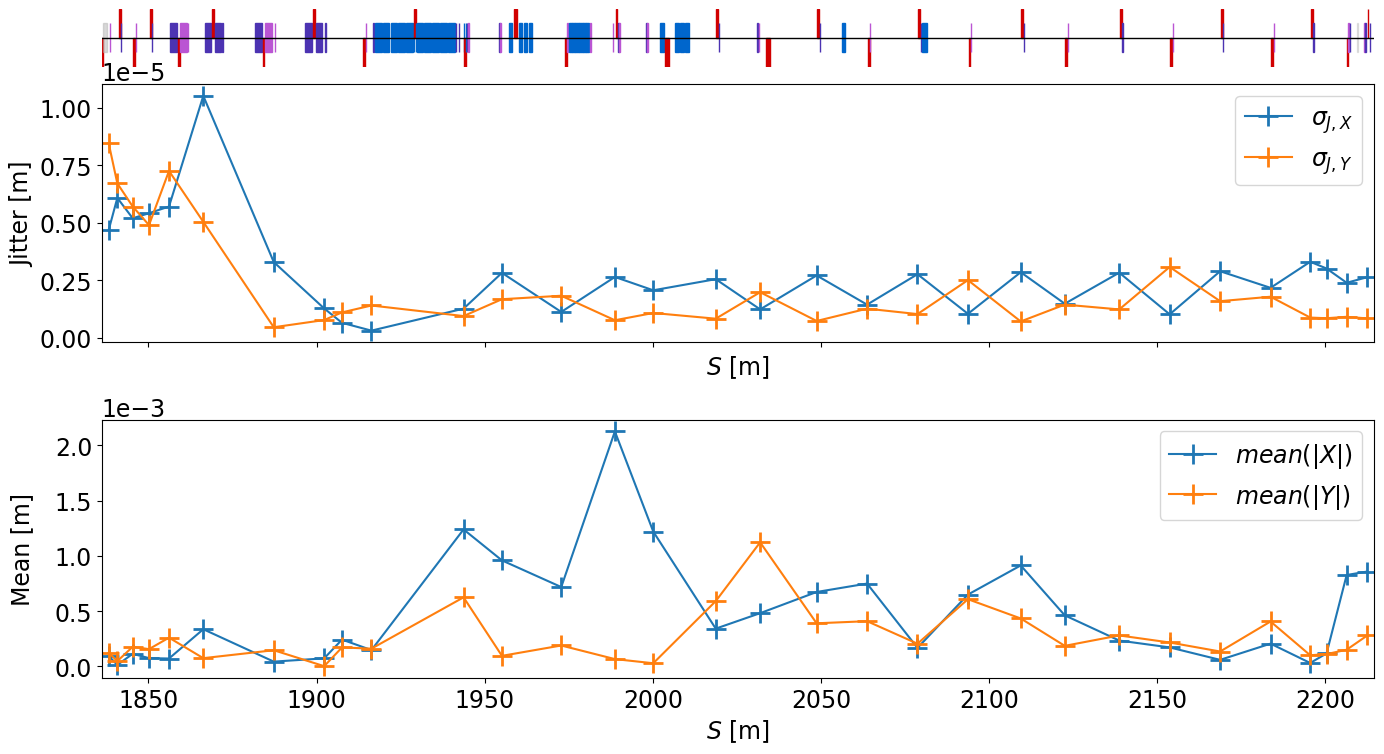

In [4]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T4D', bunches=6, plotMean=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Mean_for_T2".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


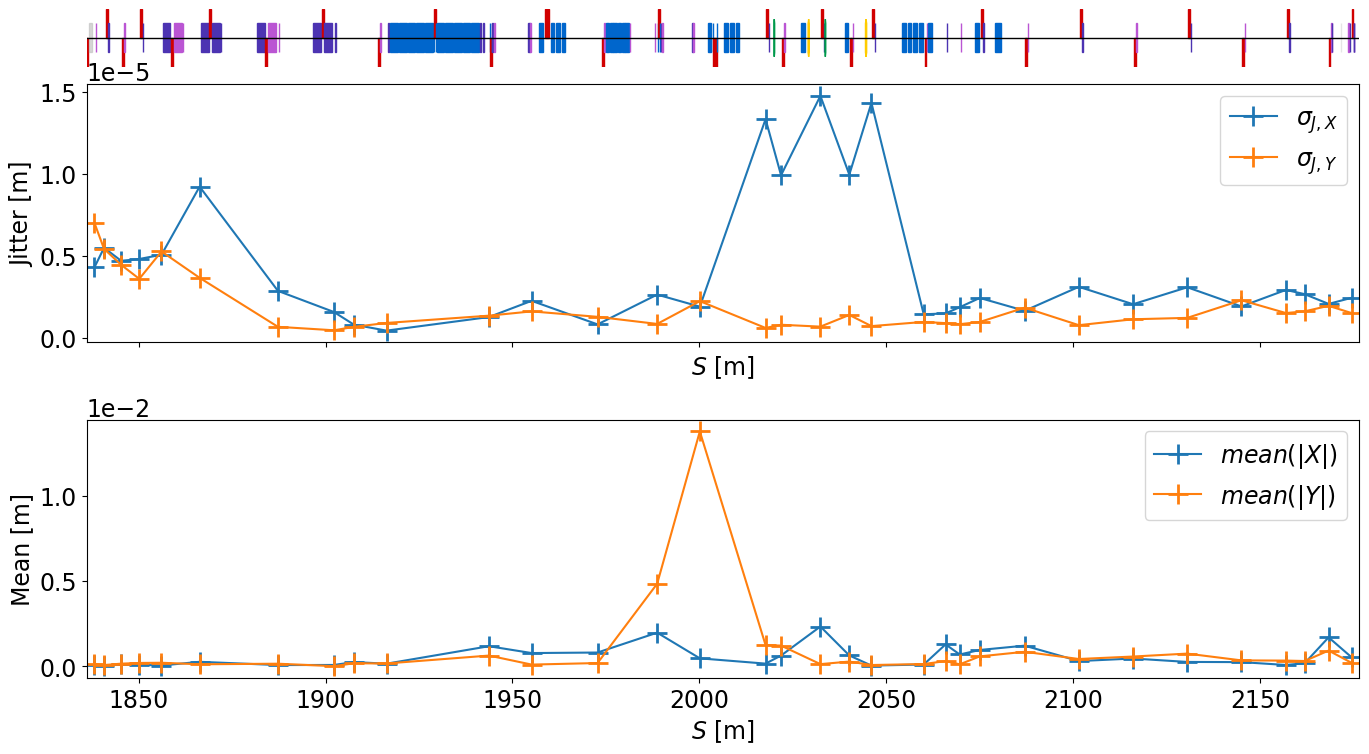

In [5]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=3, plotMean=True, figsize=[14, 8])
_plt.savefig("{}_Jitter_Mean_for_T1".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8411


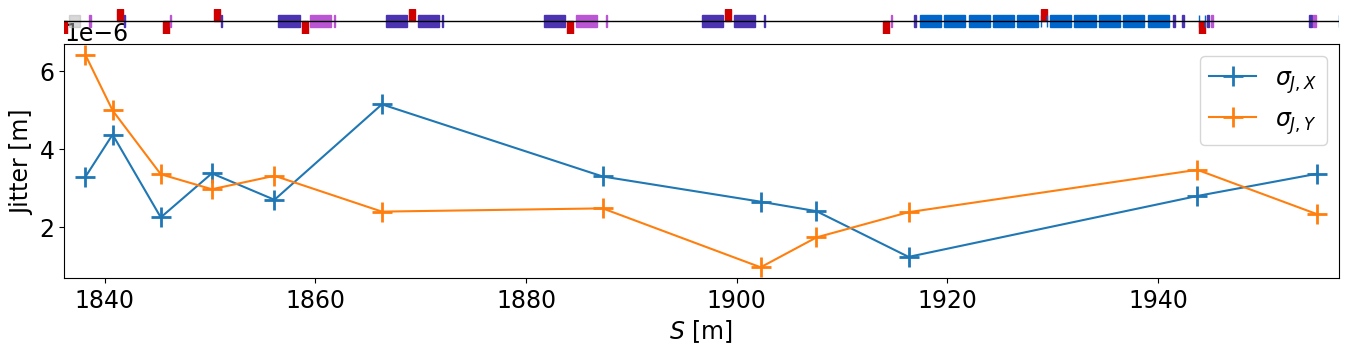

In [8]:
XFEL_BPM.plotJitterAndNoise(df, '../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=0, figsize=[14, 4])

In [5]:
df_average = XFEL_BPM.getH5dataInDF('XFEL_data/matched_linac_main_run2148_file109482_20231119T155947.all.hdf5')

Load matched_linac_main_run2148_file109482_20231119T155947.all.hdf5 | 49 bpms, 3155 trains, 2708 bunches: |██████████████████████████████████████████████████| 100.0% Complete


Mad8.readTwissFile > nrec=6662
Mad8.readTwissFile > nrec=8411
Mad8.readTwissFile > nrec=8541
Caluclate average jitter for bunch 243/243: |██████████████████████████████████████████████████| 100.0% Complete


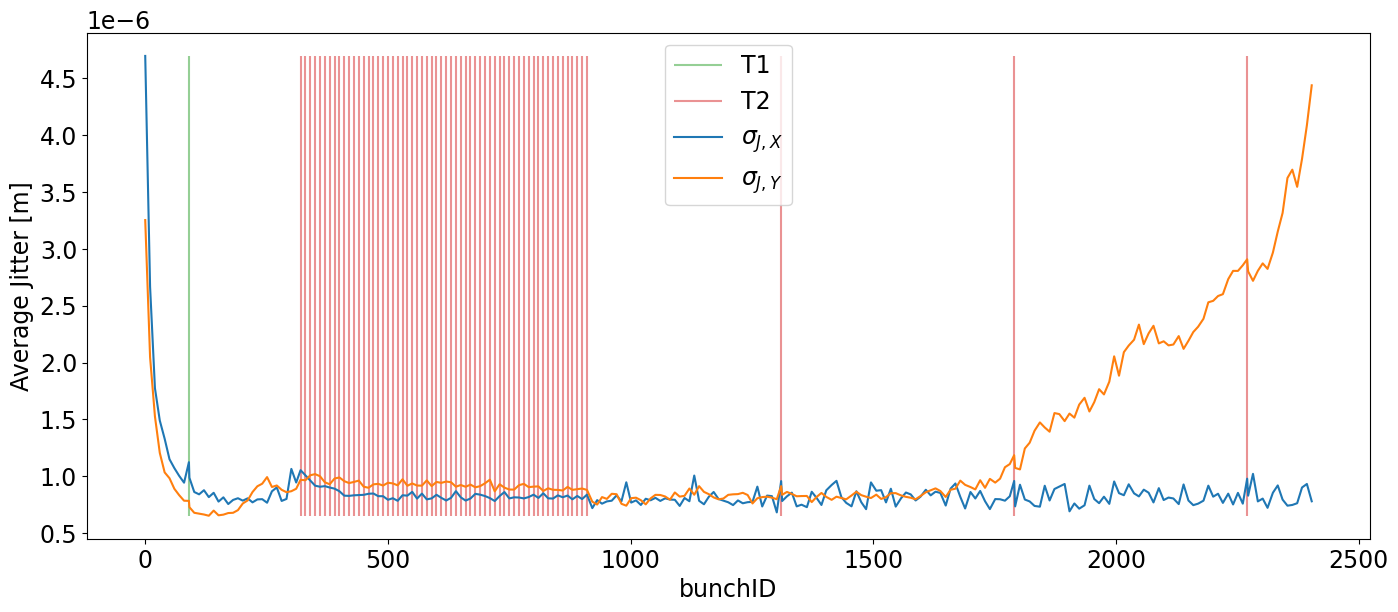

In [6]:
XFEL_BPM.plotJitterAverageForAllBunches(df_average, trains=None, Smin=1900, Smax=1950, sample=10, SigmaRatio=False, figsize=[14, 6])
_plt.savefig("{}_Jitter_Average_per_bunch_ID".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=6662
Mad8.readTwissFile > nrec=8411
Mad8.readTwissFile > nrec=8541
Caluclate average jitter for bunch 243/243: |██████████████████████████████████████████████████| 100.0% Complete


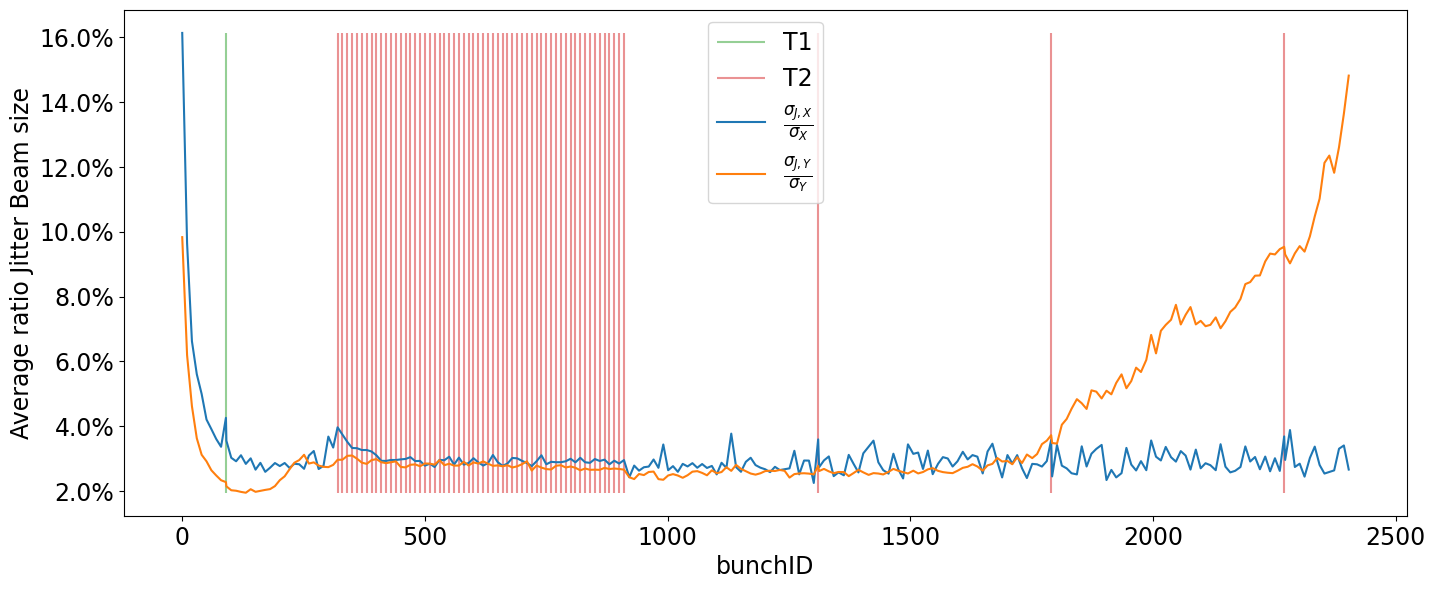

In [7]:
XFEL_BPM.plotJitterAverageForAllBunches(df_average, trains=None, Smin=1900, Smax=1950, SigmaRatio=True, sample=10, figsize=[14, 6])
_plt.savefig("{}_Jitter_Sigma_Average_per_bunch_ID".format(save_name_prefix), dpi=300, bbox_inches='tight')

# Resolution (in fact it's the same as the 'noise')

Mad8.readTwissFile > nrec=8411


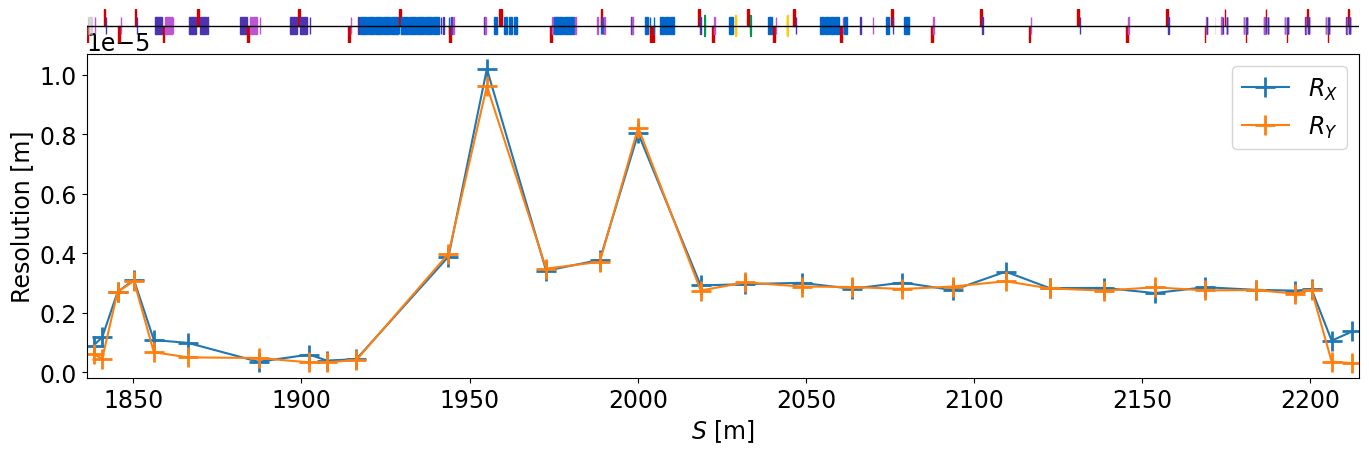

In [46]:
XFEL_BPM.plotResolution(df, '../../01_mad8/XFEL_Lattice_9/TWISS_T5D', bunches=6, figsize=[14, 5], ylog=False)